In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [25]:
#normal version
lts=open('all_spk_lts_proc_thre.txt','r').read().split('\n')
lts=[float(i) for i in lts[:-1]]#last line is newline character
print len(lts)

17828401


# final version

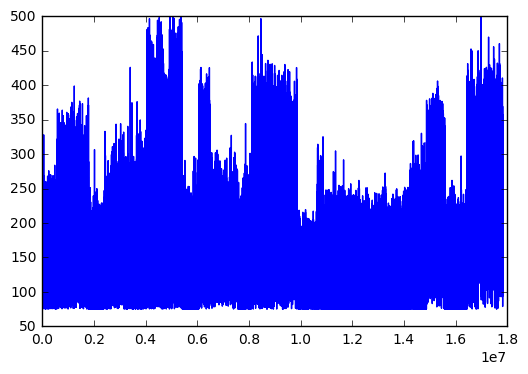

In [26]:
#this will be the final version we use, based on 75,500,0.001 and temporal jump + thresholding filtering trim. The 
#peaks reflect the speaker's means.the peaks between 0.4 and 0.6 1e7, 1.6 and 1.8, for example, reflects the high pitch
#ranges of 'FAJ' and 'XUL' speakers (mean high). There is also "KOF" that is quite high.
plt.plot(lts)


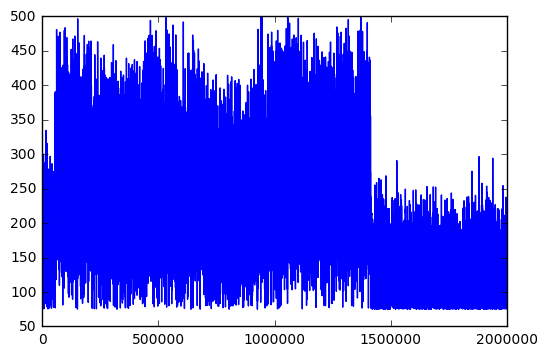

In [29]:
#final version: notice the 'FAJ'
plt.plot(lts[int(0.4*1e7):int(0.6*1e7)])

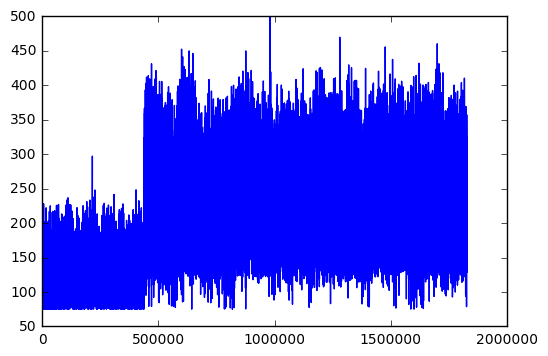

In [30]:
#final version: high values of 'XUL'
plt.plot(lts[int(1.6*1e7):int(1.8*1e7)])

In [ ]:
#let's then do a normalized version


# earlier versions

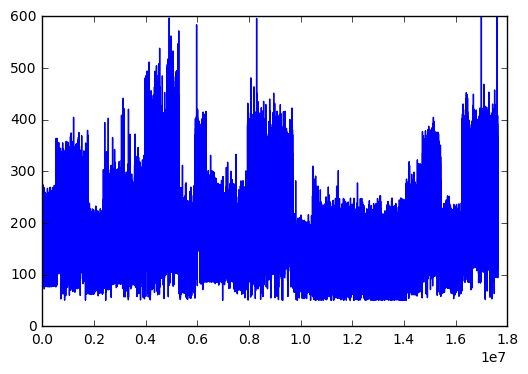

In [91]:
plt.plot(lts)#this version: 50,600,0.001 latest trim strategy.Actually, this version is not that different from the 
#final version above. The ups and downs, same as above, confirms the validity of our appraoch, as they show the 
#natuarl tendencies of different speaker range. I think in this plot, only those very long vertical lines all the way 
#up to 600HZ is spurious. In the final version plot you don't see as much of these - which means it is better. 
#but in the mean time we do notice for FAJ there is a lot of pitch values probably naturally higher than 500. 

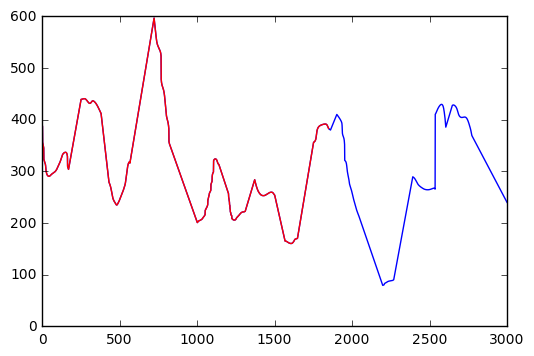

In [107]:
plt.plot(lts[int(0.49*1e7)+17000:int(0.492*1e7)])
plt.plot(lts[4917000:4918849],'r')

In [102]:
int(0.49*1e7)+17500

4917500

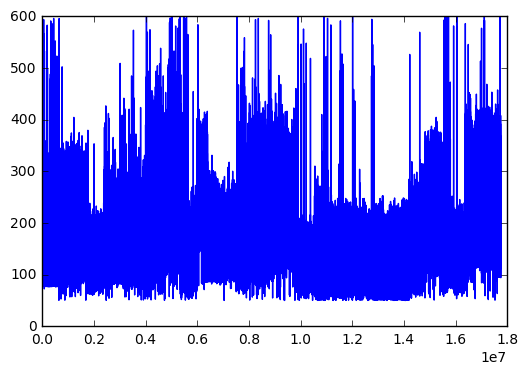

In [84]:
plt.plot(lts)


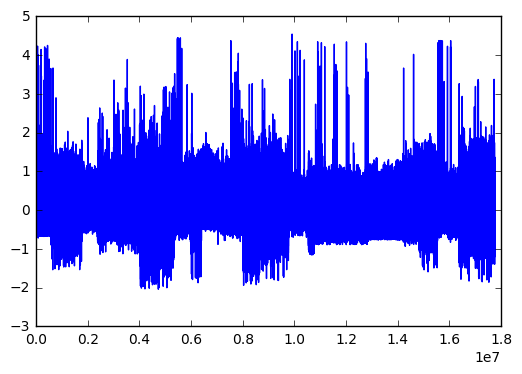

In [75]:
plt.plot(lts)#original version norm pitch


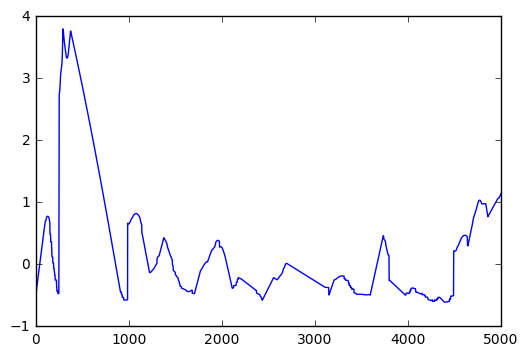

In [80]:
plt.plot(lts[15000:20000])

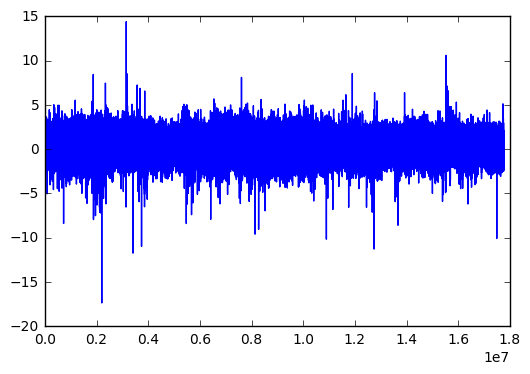

In [5]:
plt.plot(lts)#original version (no interjection) 


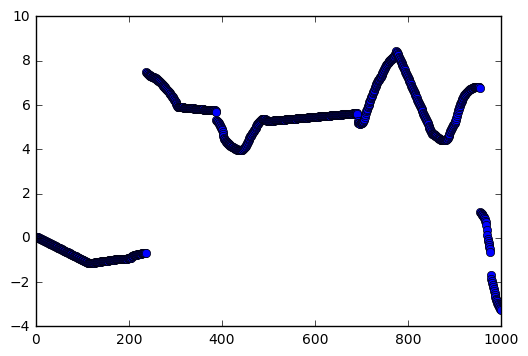

In [32]:
#plt.plot(lts[int(0.18*1e7+60000):int(0.19*1e7)])#original version
plt.plot(lts[1870000:1871000],'o')

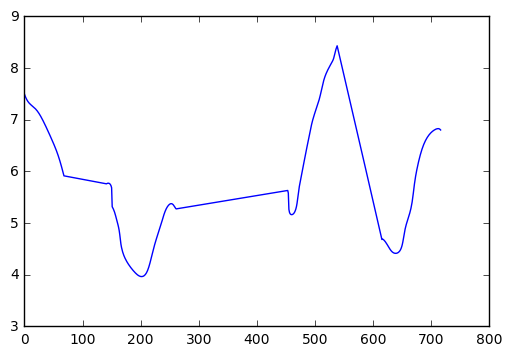

In [35]:
plt.plot(lts[1870237:1870954])

In [18]:
0.19*1e7

1900000.0

In [11]:
0.18*1e7+70000

1870000.0

In [12]:
def read_tab_only(inputfile):
    
    f=open(inputfile,'r').read().split('\n')

    time=[]
    pitch=[]
    for i in range(1,len(f)):
        line=f[i]
        if line!="":
            split=line.split('\t')
            #print split
            time.append(float(split[0]))
            pitch.append(float(split[1]))
    
    #plt.plot(pitch,'gx')
    return time,pitch

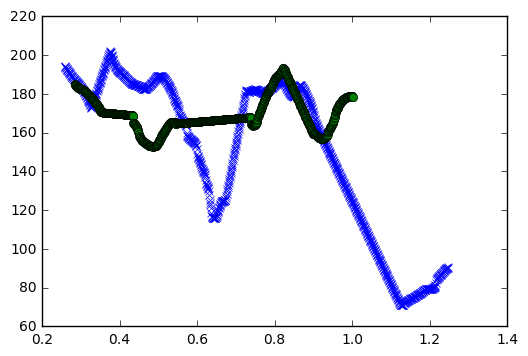

In [39]:

inputfile='procd_pitch_newtrim_sec_3/DIL000067_proc.tab'
t,p=read_tab_only(inputfile)
plt.plot(time,pitch,'x')
inputfile='procd_pitch_newtrim_sec_3/DIL000068_proc.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

In [47]:
import pickle

spk_mean_dict=pickle.load(open('procd_spk_mean_dict.p','rb'))
#std_dict=pickle.load(open('fil_std_dict.p','rb'))

In [48]:
spk_mean=spk_mean_dict['DIL']

In [49]:
spk_mean

117.25826768646937

In [53]:
inputfile='procd_pitch_newtrim_sec_3/DIL000067_proc.tab'
t,p=read_tab_only(inputfile)

In [54]:
pitch=np.array(pitch)
p=np.array(p)

In [70]:
def hertz_to_bark(pitch):
    return 7.0 * np.log (pitch/650.0 + np.sqrt (1 + (pitch/650.0)**2))

def normalize(pitch,spk_mean):
    """let's normalize one file for now"""
    #normalize,log,downsample,smooth
    #for this speaker, normalize all files of this spk
    #print pitch[:100],'here'
    pitch_float=[float(i) for i in pitch]
    pitch=np.array(pitch_float)
    bark_pitch=hertz_to_bark(pitch)
    norm_pitch=(bark_pitch- hertz_to_bark(spk_mean))
    #log_pitch=np.log(norm_pitch)
    #down_pitch=downsample_mix(log_pitch,30)
    return norm_pitch

In [71]:
norm_pitch=normalize(pitch,spk_mean)
npit=normalize(p,spk_mean)

In [63]:
time[0],time[-1]

(0.2845, 1.0015)

In [72]:
tj=np.array(t)+time[-1]

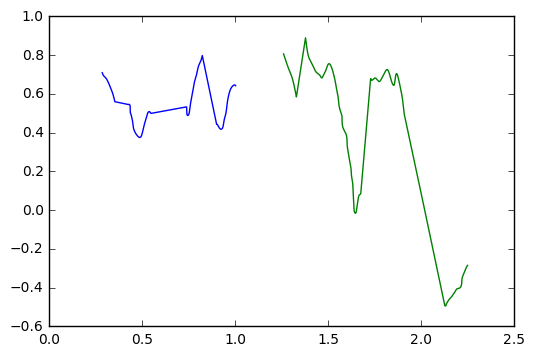

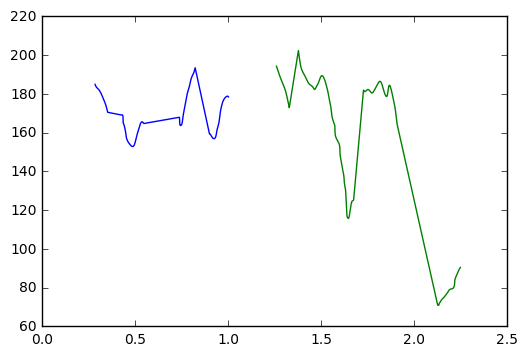

In [73]:
plt.plot(time,norm_pitch)
plt.plot(tj,npit)
plt.figure()

plt.plot(time,pitch)
plt.plot(tj,p)
#plt.ylim(120,200)

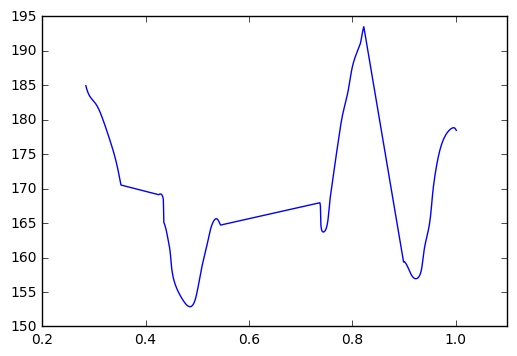

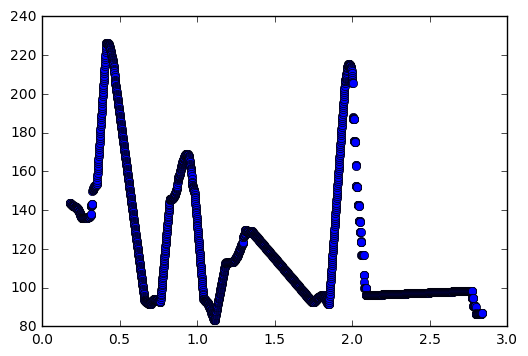

In [89]:
inputfile='procd_pitch_newtrim_threshold/CHJ000006_proc.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

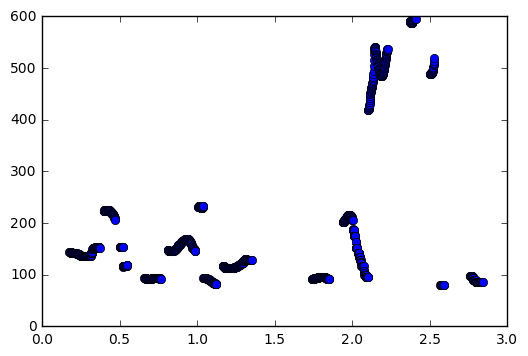

In [87]:
inputfile='pitch/pitcCHJ000006.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

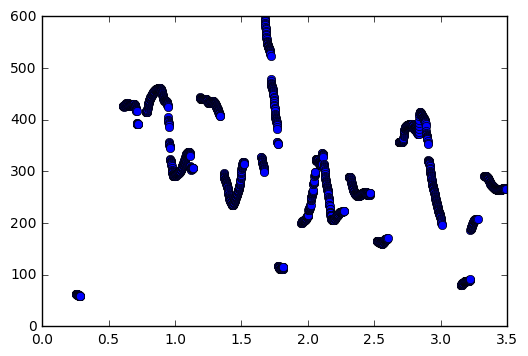

In [112]:
inputfile='pitch/pitcFAJ000702.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

In [14]:
inputfile='procd_pitch_newtrim_threshold/FAJ000702_proc.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

IOError: [Errno 2] No such file or directory: 'procd_pitch_newtrim_threshold/FAJ000702_proc.tab'

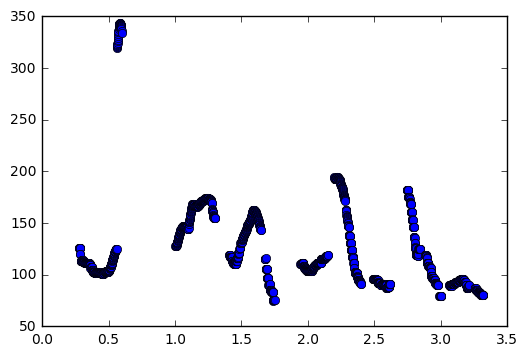

In [15]:
inputfile='pitch/pitcCHJ000056.tab'
time,pitch=read_tab_only(inputfile)
plt.plot(time,pitch,'o')

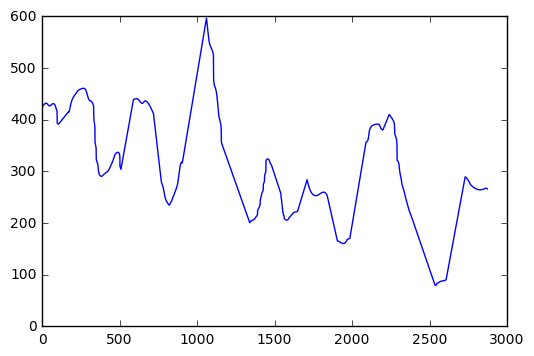

In [111]:
plt.plot(lts[4916662:4919535])

In [2]:
from os import listdir
import numpy as np
from downsample import *
import random
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

def get_speaker_mean(speaker,path):
    """path contains all pitch files, and we'll pick out files for this speaker to normalize"""
    onlyfiles = [ f for f in listdir(path) if f.startswith('pitc'+speaker) and f.endswith('.tab')]
    all_pitch=[]
    for file_pitch in onlyfiles:
        time,pitch=get_vec_noext(path+file_pitch)

        pitch_float=[float(i) for i in pitch]
        #pitch_log=np.log2(pitch_float)
        all_pitch.extend(pitch_float)
    return all_pitch,np.mean(all_pitch)


def normalize(pitch,spk_mean):
    """let's normalize one file for now"""
    #normalize,log,downsample,smooth
    #for this speaker, normalize all files of this spk
    #print pitch[:100],'here'
    pitch_float=[float(i) for i in pitch]
    pitch=np.array(pitch_float)
    log_pitch=np.log2(pitch)
    log_spk_mean=np.log2(spk_mean)
    norm_pitch=(log_pitch-log_spk_mean)/np.std(log_pitch)
    #log_pitch=np.log(norm_pitch)
    #down_pitch=downsample_mix(log_pitch,30)
    return norm_pitch





def get_all_speaker(train_path):
    
    onlyfiles = [ f for f in listdir(train_path) if f.endswith(".flac")]
    all_speaker=set()
    for file_sound in onlyfiles:
        speaker=file_sound[:3]
        if speaker not in all_speaker:
            all_speaker.add(speaker)
    return all_speaker


def get_vec_noext(file):
    """don't get extrapolated values"""
    time=[]
    pitch=[]
    f=open(file,'r').read().split('\n')
    #print 'line number:',len(f)
    for line in f[1:]:
        if line!='':
            l=line.split('\t')
            if float(l[1])!=1000:
                time.append(l[0])
                pitch.append(l[1])
    return time,pitch



def test_plot(pitch):
    x = np.linspace(0,30, len(pitch))
    plt.plot(x, pitch, 'bo-')
    plt.show()

In [4]:
import pickle,os
train_path='all_data/'
all_speaker=get_all_speaker(train_path)
pitch_path='pitch/'
#print onlyfiles
pickle_file='spk_mean_dict.p'
pickle_file_ap='all_pitch_dict.p'
spk_mean_dict={}
all_pitch_dict={}
for speaker in all_speaker:
    #working with one speaker
    if os.path.isfile(pickle_file):
        spk_mean_dict=pickle.load(open(pickle_file,'rb'))
        all_pitch_dict=pickle.load(open(pickle_file_ap,'rb'))
        print 'loading speaker mean...'
        spk_mean=spk_mean_dict[speaker]
        all_pitch=all_pitch_dict[speaker]
    else:
        all_pitch,spk_mean=get_speaker_mean(speaker,pitch_path)
        print speaker+'mean:'+str(spk_mean)
        spk_mean_dict[speaker]=spk_mean
        all_pitch_dict[speaker]=all_pitch
    all_pitch_norm=(np.log2(all_pitch)-np.log2(spk_mean))/np.std(np.log2(all_pitch))
    #print spk_mean
    #normalize,log,downsample,smooth
    #test with a file of this speaker
    #in a real situation, you'll get all files of the speaker, and call normalize and save them one by one.
    plt.figure()
    plt.hist(all_pitch_norm)
    plt.title(speaker)
    plt.axvline(x=np.percentile(all_pitch_norm,96))
if not os.path.isfile(pickle_file): 
    pickle.dump(spk_mean_dict, open( pickle_file, "wb" ) )
    pickle.dump(all_pitch_dict, open( pickle_file_ap, "wb" ) )

loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...
loading speaker mean...


In [6]:
import pickle,os
train_path='all_data/'
all_speaker=get_all_speaker(train_path)
pitch_path='pitch/'
#print onlyfiles
pickle_file='spk_mean_dict.p'
spk_mean_dict={}

if os.path.isfile(pickle_file):
    spk_mean_dict=pickle.load(open(pickle_file,'rb'))
else:
    all_pitch_dict={}
for speaker in all_speaker:
    #working with one speaker
    if os.path.isfile(pickle_file):
        print 'loading speaker mean...'
        spk_mean=spk_mean_dict[speaker]
        all_pitch=all_pitch_dict[speaker]
    else:
        all_pitch,spk_mean=get_speaker_mean(speaker,pitch_path)
        print speaker+'mean:'+str(spk_mean)
        spk_mean_dict[speaker]=spk_mean
        all_pitch_dict[speaker]=all_pitch
    #all_pitch_norm=(np.log2(all_pitch)-np.log2(spk_mean))/np.std(np.log2(all_pitch))
    #print spk_mean
    #normalize,log,downsample,smooth
    #test with a file of this speaker
    #in a real situation, you'll get all files of the speaker, and call normalize and save them one by one.
    plt.figure()
    #plt.hist(all_pitch_norm)
    plt.hist(all_pitch,bins=20)
    plt.title(speaker)
    #plt.axvline(x=np.percentile(all_pitch,97))
    plt.axvline(x=threshold_dict[speaker])
    plt.axvline(x=spk_mean)
if not os.path.isfile(pickle_file): 
    pickle.dump(spk_mean_dict, open( pickle_file, "wb" ) )

loading speaker mean...


KeyError: 'DIL'

In [8]:
%matplotlib inline

[  1.35457028e-02   1.48287409e-02   8.32776235e-03   4.61111520e-03
   3.51226941e-03   1.88986336e-03   6.50980969e-04   7.69570525e-05
   1.64006833e-05   3.40629577e-05   2.14470474e-05   1.00927282e-05
   1.76622743e-05   2.77550025e-05   4.92020500e-05   8.20034166e-05
   9.71425089e-05   8.32650076e-05   3.53245487e-05   1.64006833e-05] [  74.93920548   95.80115838  116.66311128  137.52506417  158.38701707
  179.24896996  200.11092286  220.97287576  241.83482865  262.69678155
  283.55873444  304.42068734  325.28264024  346.14459313  367.00654603
  387.86849892  408.73045182  429.59240472  450.45435761  471.31631051
  492.1782634 ]
DIL 0.000650980968792 7.69570525123e-05 220.972875756
[  2.96770039e-03   7.62464808e-03   1.00220142e-02   7.45956255e-03
   5.70078309e-03   4.53025415e-03   3.63657407e-03   2.50230422e-03
   1.56127403e-03   5.49005375e-04   1.45462963e-04   4.56438035e-05
   3.62590963e-05   5.03361572e-05   6.91055717e-05   5.71613988e-05
   5.46019332e-05   5.24

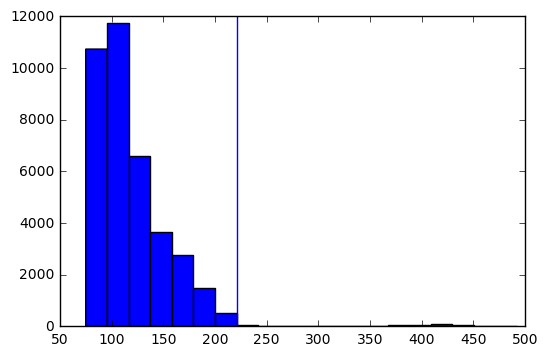

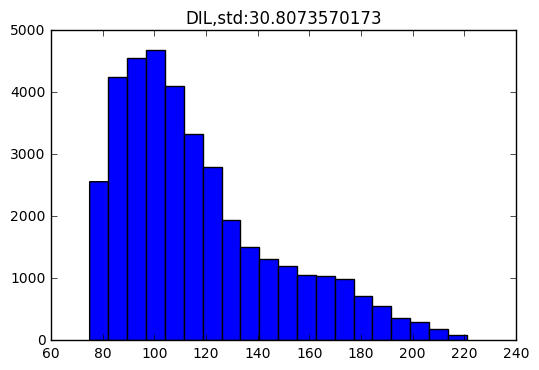

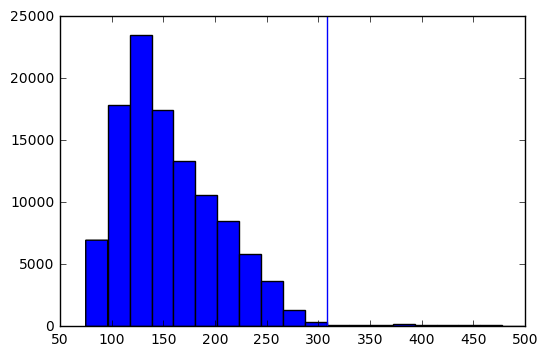

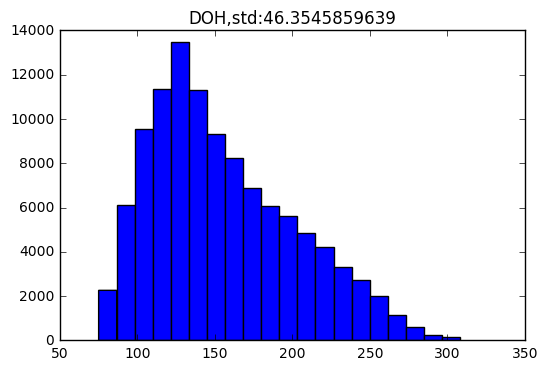

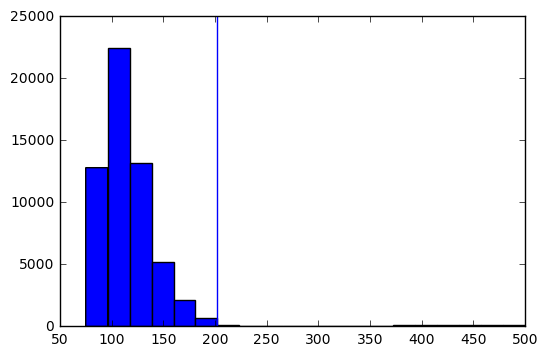

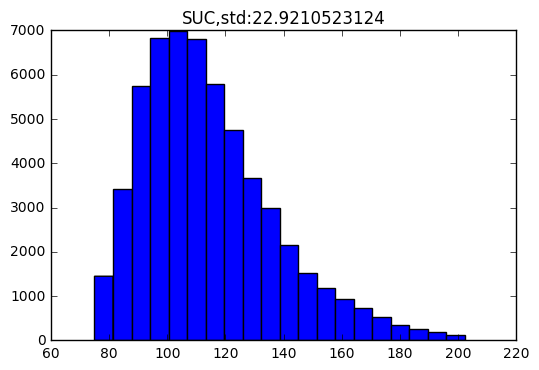

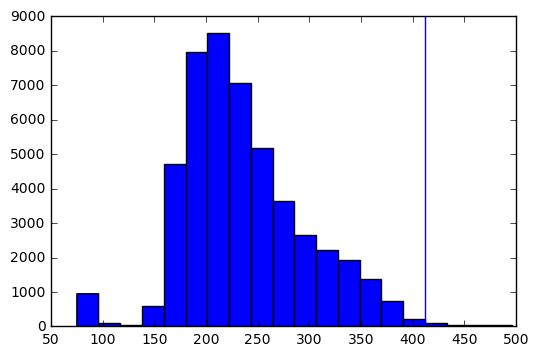

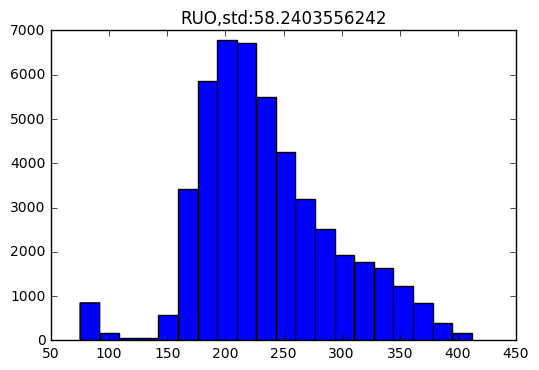

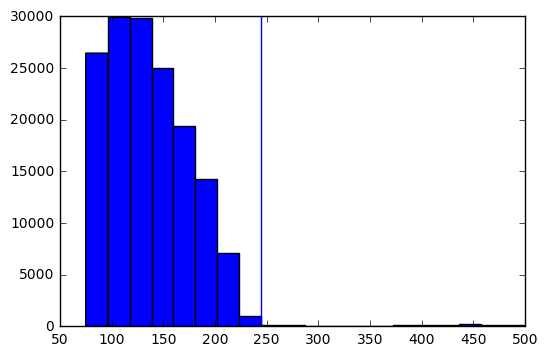

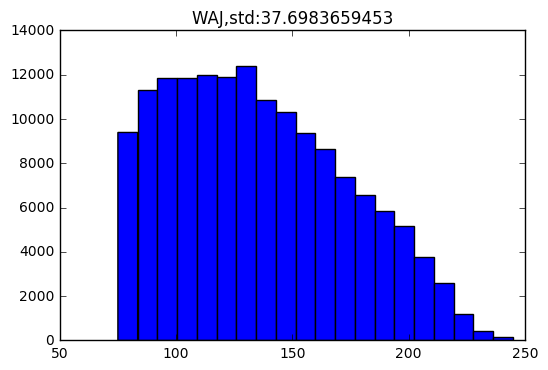

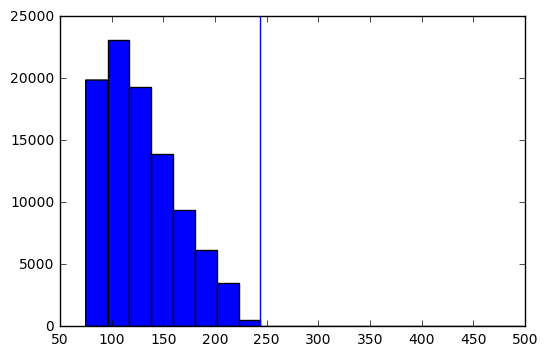

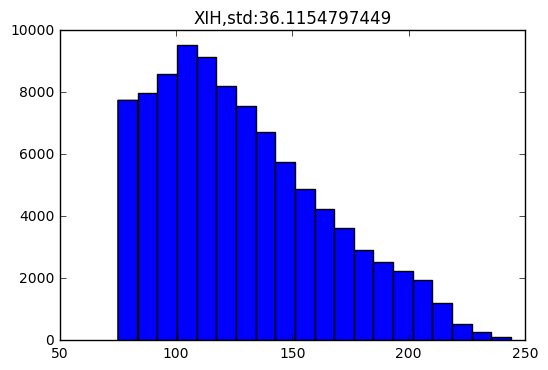

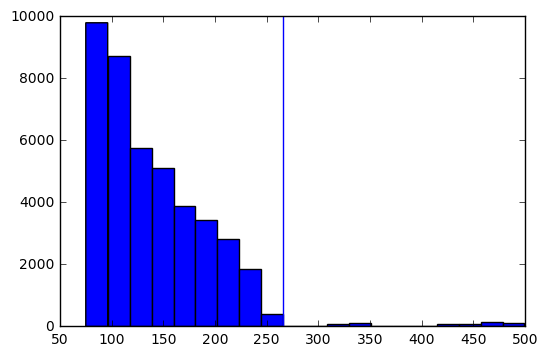

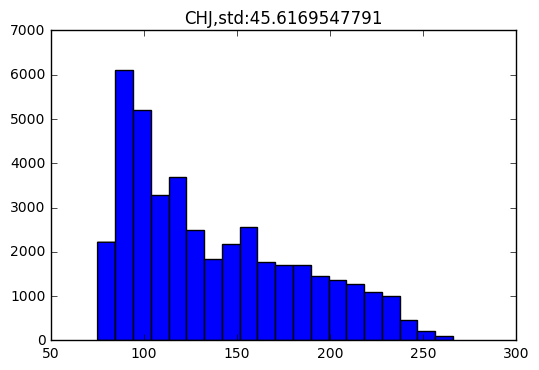

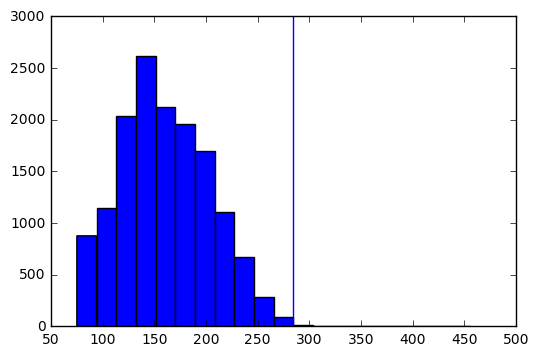

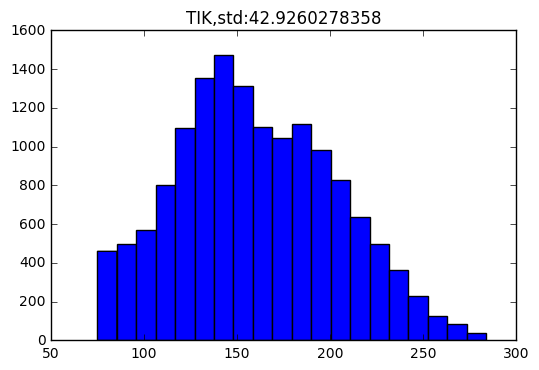

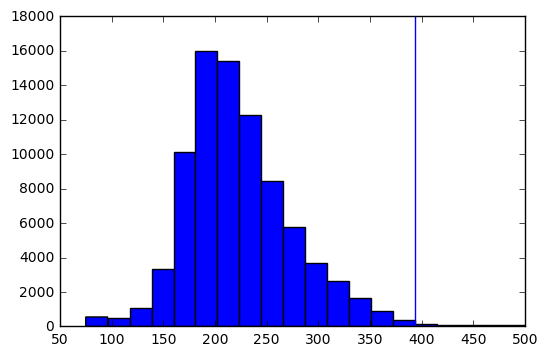

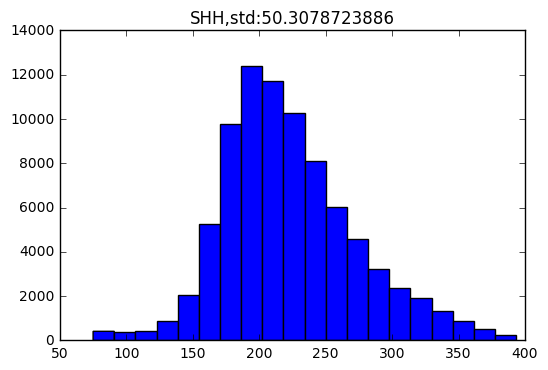

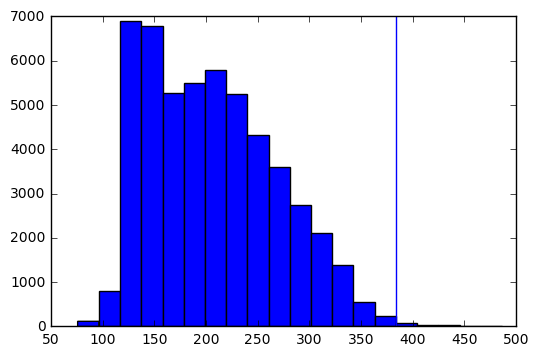

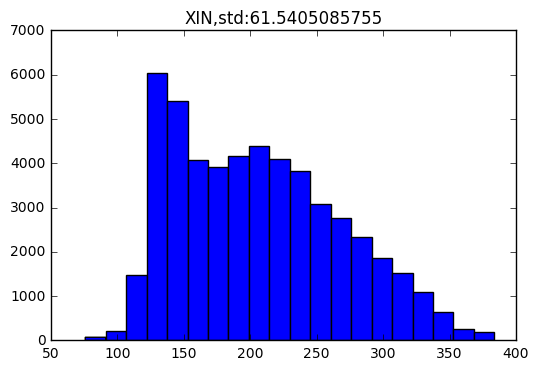

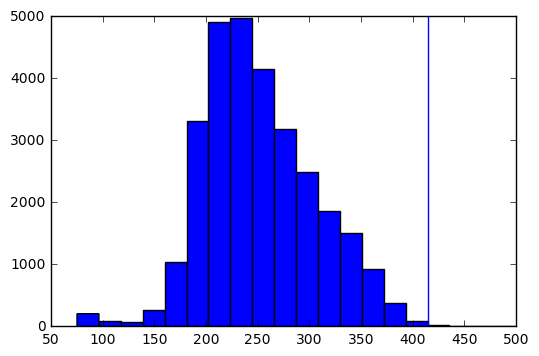

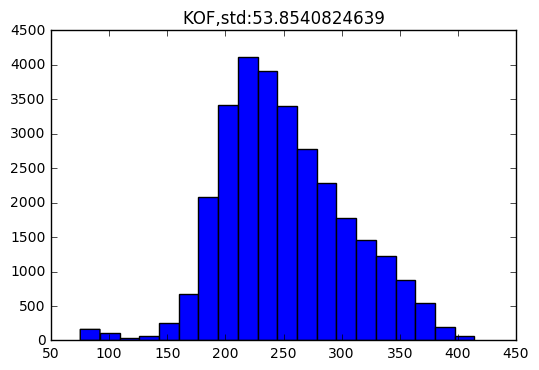

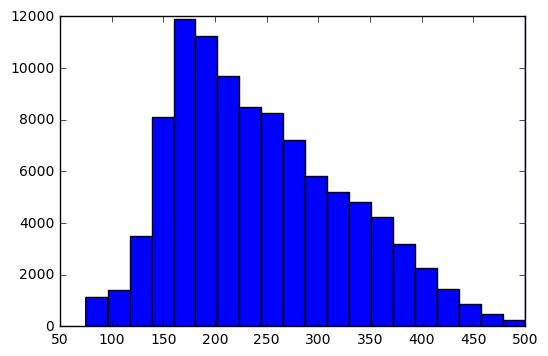

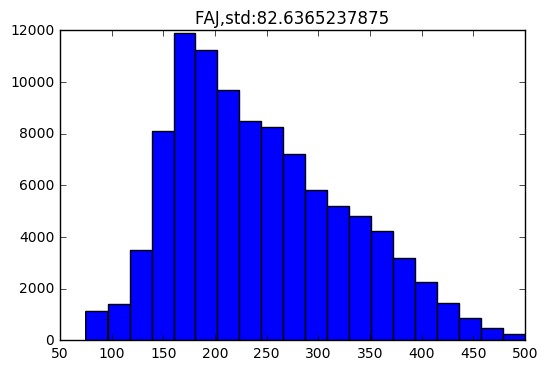

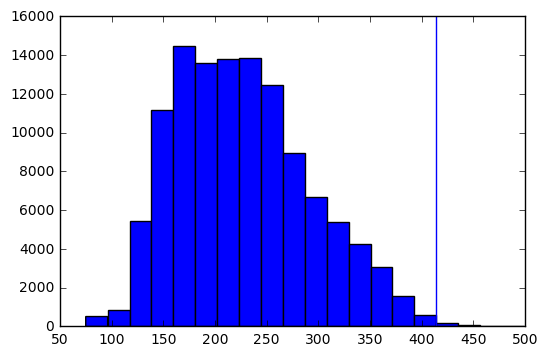

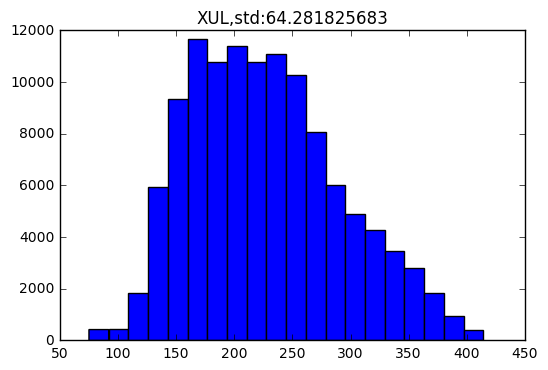

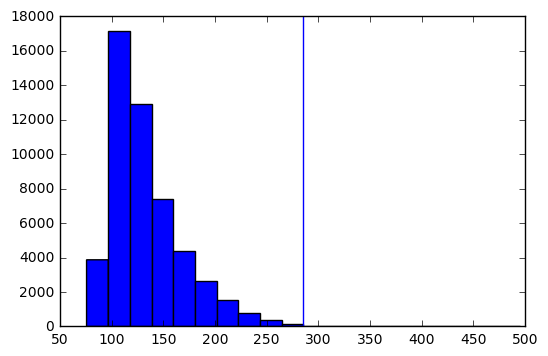

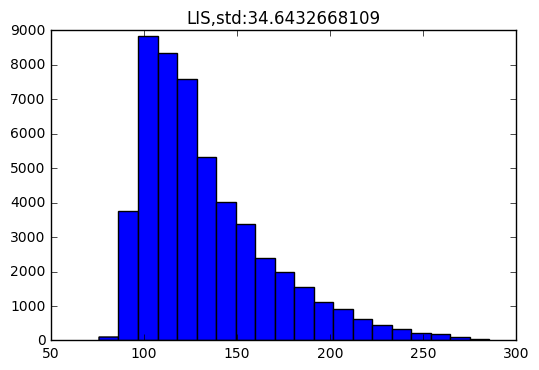

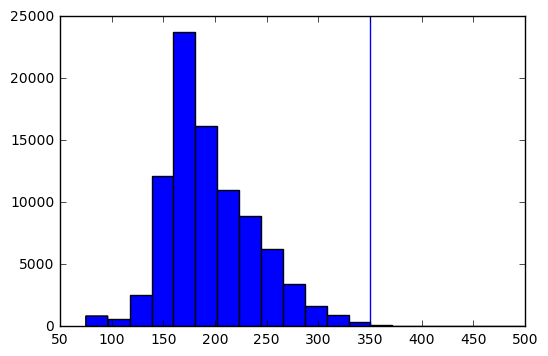

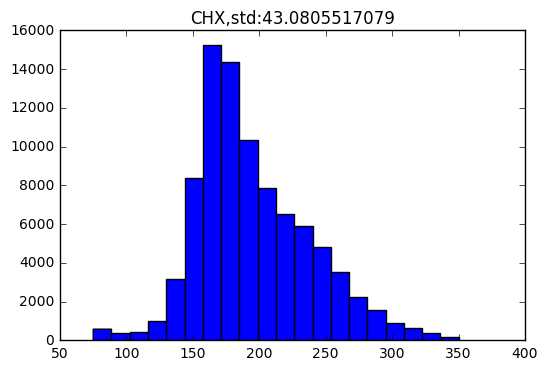

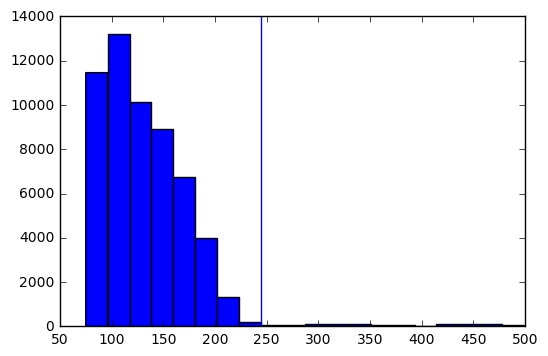

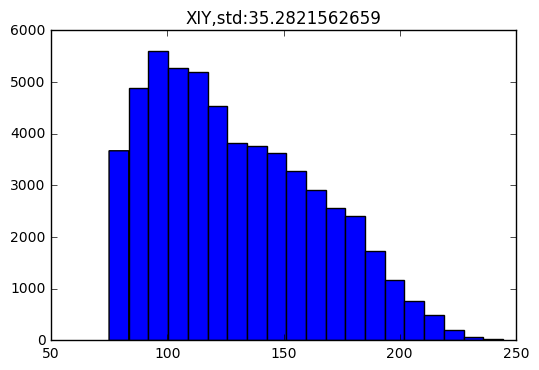

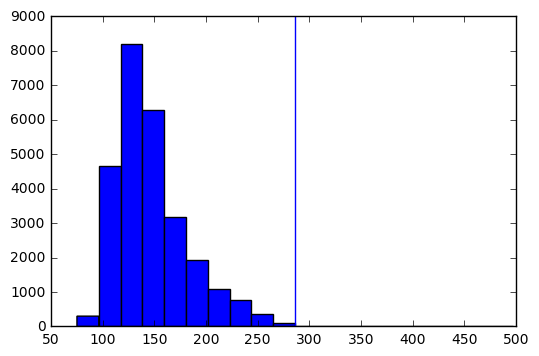

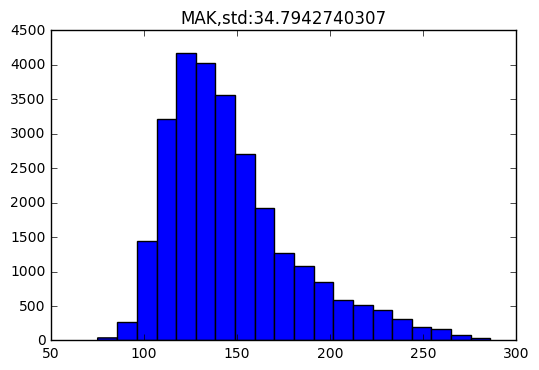

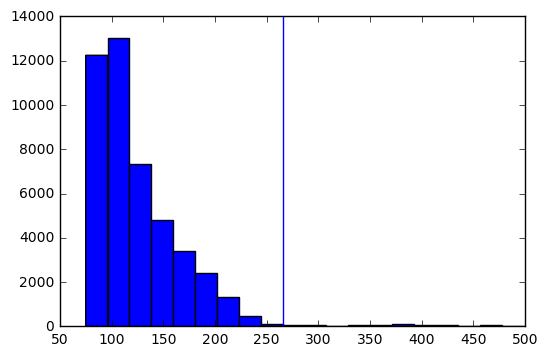

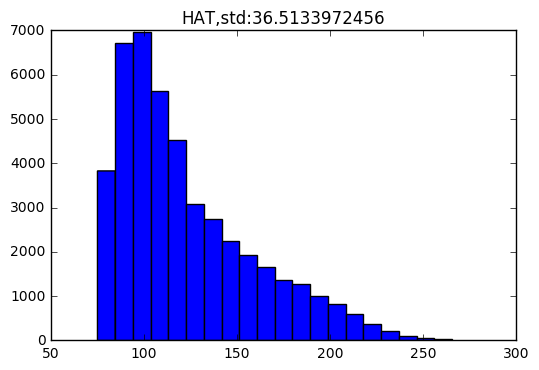

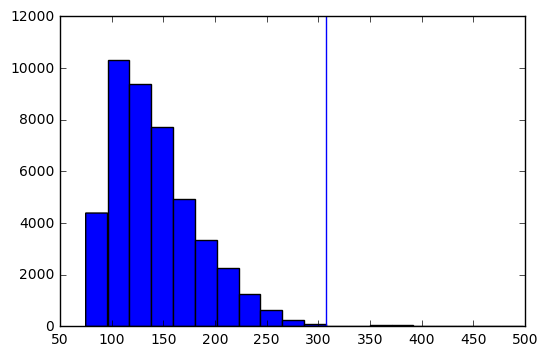

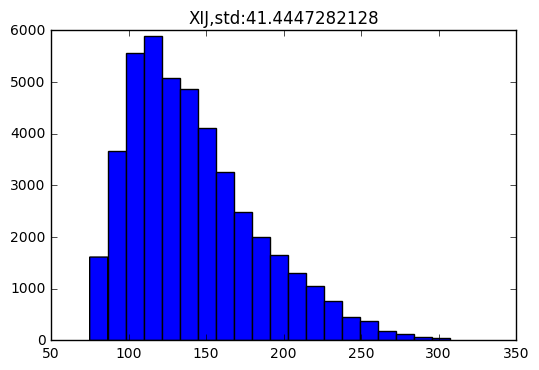

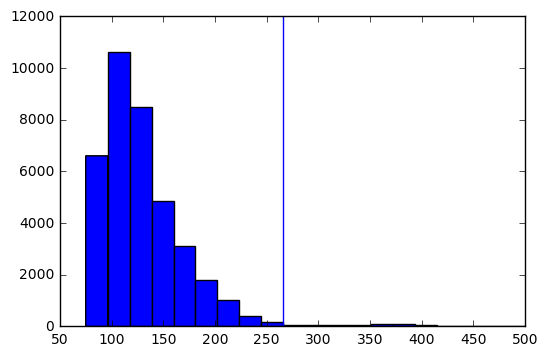

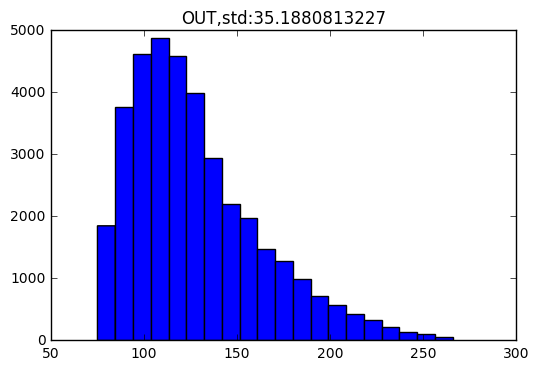

In [10]:
fil_std_dict={}
threshold_dict={}
for spk in all_pitch_dict:
    all_pitch_spk=all_pitch_dict[spk]
    hist,bin_edges=np.histogram(all_pitch_spk,bins=20,density=True)
    print hist,bin_edges

    max_ind=np.argmax(hist)
    
    for i in range(len(hist)):
        if i>max_ind and hist[i]<1e-4:
            threshold=bin_edges[i]
            print spk,hist[i-1],hist[i],threshold
            break
    if i==len(hist)-1:
        print 'no threshold found'
        threshold=bin_edges[-1]
    
    all_pitch_spk_fil=[j for j in all_pitch_spk if j<=threshold]
    plt.figure()
    plt.hist(all_pitch_dict[spk],bins=20)
    plt.axvline(x=threshold)
    plt.figure()
    plt.hist(all_pitch_spk_fil,bins=20)
    plt.title(spk+",std:"+str(np.std(all_pitch_spk_fil)))
    fil_std_dict[spk]=np.std(all_pitch_spk_fil)
    threshold_dict[spk]=threshold

In [11]:
threshold_dict

{'CHJ': 266.0398457579609,
 'CHX': 350.53383545126144,
 'DIL': 220.97287575608323,
 'DOH': 308.38383341335361,
 'FAJ': 499.84299098926931,
 'HAT': 265.60250456595998,
 'KOF': 414.38687347661107,
 'LIS': 285.65864243629915,
 'MAK': 286.20669745123985,
 'OUT': 266.16242532693309,
 'RUO': 411.84704291683738,
 'SHH': 393.49618185872464,
 'SUC': 202.42979076292519,
 'TIK': 284.4555918632127,
 'WAJ': 244.83095779479373,
 'XIH': 244.05429657437702,
 'XIJ': 307.49985190409546,
 'XIN': 383.7083223324081,
 'XIY': 244.67293398969187,
 'XUL': 414.23399312747392}

In [12]:
threshold_dict_pickle='threshold_dict.p'
if not os.path.isfile(threshold_dict_pickle):
    pickle.dump(threshold_dict, open(threshold_dict_pickle, "wb") )


In [13]:
fil_std_dict

{'CHJ': 45.616954779101206,
 'CHX': 43.080551707873667,
 'DIL': 30.807357017321294,
 'DOH': 46.354585963892561,
 'FAJ': 82.636523787472896,
 'HAT': 36.513397245572676,
 'KOF': 53.854082463858092,
 'LIS': 34.643266810902936,
 'MAK': 34.794274030711435,
 'OUT': 35.18808132274102,
 'RUO': 58.240355624191707,
 'SHH': 50.307872388604309,
 'SUC': 22.921052312388163,
 'TIK': 42.926027835806536,
 'WAJ': 37.698365945294668,
 'XIH': 36.11547974487096,
 'XIJ': 41.444728212771579,
 'XIN': 61.540508575522871,
 'XIY': 35.282156265870107,
 'XUL': 64.281825682995148}